In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
dataset = pd.read_csv("kc_house_data.csv")
dataset.head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
5,1230000.0,4,4.50,5420,101930,1.0,3,11,3890,1530,2001,0,47.6561,-122.005,4760,101930
6,257500.0,3,2.25,1715,6819,2.0,3,7,1715,0,1995,0,47.3097,-122.327,2238,6819
7,291850.0,3,1.50,1060,9711,1.0,3,7,1060,0,1963,0,47.4095,-122.315,1650,9711
8,229500.0,3,1.00,1780,7470,1.0,3,7,1050,730,1960,0,47.5123,-122.337,1780,8113
9,323000.0,3,2.50,1890,6560,2.0,3,7,1890,0,2003,0,47.3684,-122.031,2390,7570


In [3]:
X = dataset.iloc[ : ,1: 16]
Y = dataset.iloc[ : ,0]
#X = X.drop(['lat', 'long'], axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [4]:
from sklearn.preprocessing import MinMaxScaler
mmScaler = MinMaxScaler()
#astype = async type
X = mmScaler.fit_transform(X.astype(float))

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [6]:
#imports for neural network

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [8]:
#Building the network
model = Sequential()
model.add(Dense(100, activation="relu")) #We are using dense layers. (Amount of Neurons, Activations)
model.add(Dense(100, activation="relu")) #Two standard values to pass for activation. relu and sigmoid.
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(100, activation="relu"))
model.add(Dense(1)) #We only use 1 as for regression we only want 1 output.

#You can modify this however you want, this example we will use 5 layers.
#Can use 6 or even 10. Can change this when wanting to do improvements.
#With each layer can change the Amount of Neurons too. i.e. 2nd layer could use 25, 3rd layer could use 20.

In [9]:
#This is where we set the optimiser that we have imported. (from Keras library)
model.compile(optimizer='Adam', loss='mae') # Mean Absolute Error.

In [10]:
#The epoch value = how many times model should train.
#Could change this for improvements.

#Validation is same as a human revising and then testing. You can train too much - look into this.
#batch_size is the amount of records you look at a single time. 
#Smaller the value the more indetail the model will learn, but slower it trains.
#Higher the batchsize the quicker it trains and less indetail (might miss patterns and trends)

model.fit(x=X_train, y=y_train.values, epochs=120, validation_data=(X_test, y_test), batch_size=32)

Epoch 1/120
541/541 [==============================] - 4s 6ms/step - loss: 200905.8438 - val_loss: 119596.8750
Epoch 2/120
541/541 [==============================] - 3s 5ms/step - loss: 121186.2109 - val_loss: 109509.8281
Epoch 3/120
541/541 [==============================] - 3s 5ms/step - loss: 113641.0859 - val_loss: 105379.6250
Epoch 4/120
541/541 [==============================] - 3s 5ms/step - loss: 108462.1172 - val_loss: 100645.1172
Epoch 5/120
541/541 [==============================] - 3s 5ms/step - loss: 105158.2031 - val_loss: 104938.6016
Epoch 6/120
541/541 [==============================] - 3s 5ms/step - loss: 102595.8672 - val_loss: 96599.0469
Epoch 7/120
541/541 [==============================] - 3s 5ms/step - loss: 99428.2969 - val_loss: 93339.5000
Epoch 8/120
541/541 [==============================] - 3s 5ms/step - loss: 97344.7734 - val_loss: 88721.2734
Epoch 9/120
541/541 [==============================] - 3s 5ms/step - loss: 96131.5625 - val_loss: 94444.1797
Epoch 10

541/541 [==============================] - 3s 5ms/step - loss: 73138.2422 - val_loss: 69784.1562
Epoch 76/120
541/541 [==============================] - 3s 5ms/step - loss: 71394.8750 - val_loss: 70251.9766
Epoch 77/120
541/541 [==============================] - 3s 5ms/step - loss: 71211.8281 - val_loss: 70630.3047
Epoch 78/120
541/541 [==============================] - 3s 5ms/step - loss: 71435.7969 - val_loss: 70097.1875
Epoch 79/120
541/541 [==============================] - 3s 5ms/step - loss: 70701.6562 - val_loss: 77619.5625
Epoch 80/120
541/541 [==============================] - 3s 5ms/step - loss: 71654.8438 - val_loss: 69438.3594
Epoch 81/120
541/541 [==============================] - 3s 5ms/step - loss: 71396.4375 - val_loss: 77914.6562
Epoch 82/120
541/541 [==============================] - 3s 5ms/step - loss: 71130.1172 - val_loss: 70564.6797
Epoch 83/120
541/541 [==============================] - 3s 5ms/step - loss: 70740.0781 - val_loss: 71921.4688
Epoch 84/120
541/541 [=

In [11]:
y_pred = model.predict(X_test)

136/136 [==============================] - 1s 3ms/step


In [12]:
from sklearn.metrics import r2_score # Analyse accuracy of our model. One of the most common in r^2 regression score.
R2s = r2_score(y_test, y_pred)       # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
R2s

0.8601351302282261

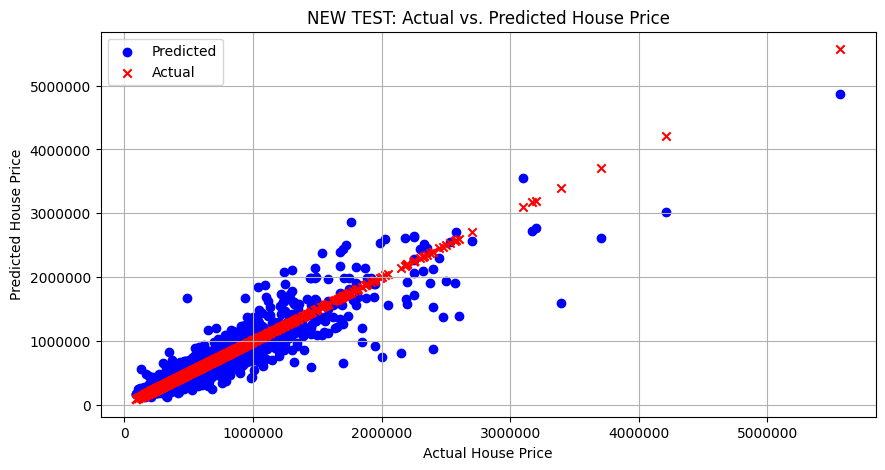

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.ticklabel_format(style='plain')
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_test, y_test, color='red', label='Actual', marker='x')
plt.xlabel('Actual House Price')
plt.ylabel('Predicted House Price')
plt.title('NEW TEST: Actual vs. Predicted House Price')
plt.legend()

plt.grid(True)
plt.show()